In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

# Dataset

In [11]:
# Download Projective Mnist
!python datasets.py projective_mnist --data_dir=/home/zyxue/ece594n/equivariant-transformers/data/mnist

INFO:root:Projective MNIST dataset
INFO:root:seed = 1, output_size = 64, copies = 8, num_train = 10000, num_valid = 5000
100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 90080212.25it/s]
Extracting /home/zyxue/ece594n/equivariant-transformers/data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /home/zyxue/ece594n/equivariant-transformers/data/mnist/MNIST/raw

100%|██████████████████████████████| 28881/28881 [00:00<00:00, 235672556.08it/s]
Extracting /home/zyxue/ece594n/equivariant-transformers/data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /home/zyxue/ece594n/equivariant-transformers/data/mnist/MNIST/raw

100%|███████████████████████████| 1648877/1648877 [00:00<00:00, 55991413.30it/s]
Extracting /home/zyxue/ece594n/equivariant-transformers/data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/zyxue/ece594n/equivariant-transformers/data/mnist/MNIST/raw

100%|█████████████████████████████████| 4542/4542 [00:00<00:00, 25743957.79it/s]
Extracting /home/zyxue/ece594n/equ

In [12]:
# Download SVHN
!python datasets.py svhn --data_dir=/home/zyxue/ece594n/equivariant-transformers/data/svhn

INFO:root:SVHN dataset
INFO:root:seed = 1, num_valid = 5000
100%|█████████████████████████| 64275384/64275384 [00:03<00:00, 18864525.49it/s]
INFO:root:Saved training set to /home/zyxue/ece594n/equivariant-transformers/data/svhn/train.pt
INFO:root:Saved validation set to /home/zyxue/ece594n/equivariant-transformers/data/svhn/valid.pt
INFO:root:Saved test set to /home/zyxue/ece594n/equivariant-transformers/data/svhn/test.pt
INFO:root:Done


In [2]:
import numpy as np
import torch
from experiments import Model, Dataset
from experiment_mnist import MNISTModel
from experiment_svhn import SVHNModel
from etn import coordinates, networks, transformers
import matplotlib.pyplot as plt
from visualization import visualize_transformation

In [13]:
# Model Path
mnist_model_path = 'pretrained/etn-projmnist-8x.pt'
svhn_model_path = 'pretrained/etn-resnet34-svhn.pt'


# Datasets Path
mnist_data_path = '/home/zyxue/ece594n/equivariant-transformers/data/mnist/valid.pt'
svhn_data_path = '/home/zyxue/ece594n/equivariant-transformers/data/svhn/valid.pt'

In [14]:
# Load Data
mnist_data = Dataset(path=mnist_data_path, 
                     normalization=(
                         MNISTModel.normalization_mean, 
                         MNISTModel.normalization_std)
)

svhn_data = Dataset(path=svhn_data_path, 
                    normalization=(
                        SVHNModel.normalization_mean, 
                        SVHNModel.normalization_std))


# Load Models
mnist_model = MNISTModel(load_path=mnist_model_path)
svhn_model = SVHNModel(load_path=svhn_model_path)


INFO:root:Projective MNIST classification
INFO:root:Loading model from file: pretrained/etn-projmnist-8x.pt -- using saved model configuration
INFO:root:Transformers: ShearX -> HyperbolicRotation -> PerspectiveX -> PerspectiveY
INFO:root:Pose module: EquivariantPosePredictor
INFO:root:Coordinate transformation before classification: logpolar_grid
INFO:root:Classifier architecture: BasicCNN
INFO:root:Net opts: {'nf': 32, 'p_dropout': 0.3, 'pad_mode': (None, 'cyclic'), 'pool': (True, True, False)}
INFO:root:Transformer opts: {'in_channels': 1, 'kernel_size': 3, 'nf': 32, 'strides': (2, 1)}
INFO:root:Street View House Numbers classification (single-digit)
INFO:root:Loading model from file: pretrained/etn-resnet34-svhn.pt -- using saved model configuration


INFO:root:Transformers: Translation -> RotationScale -> ScaleX
INFO:root:Pose module: EquivariantPosePredictor
INFO:root:Coordinate transformation before classification: identity_grid
INFO:root:Classifier architecture: resnet34
INFO:root:Net opts: {'nf': 32, 'p_dropout': 0.25, 'pad_mode': ('constant', 'constant')}
INFO:root:Transformer opts: {'in_channels': 3, 'kernel_size': 3, 'nf': 32, 'strides': (1, 1)}


example index = 235


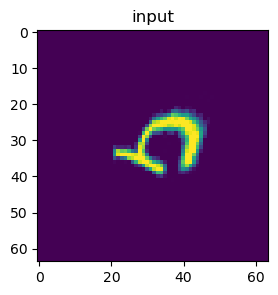

/home/zyxue/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:4316: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


ShearX
predicted parameter(s) = [-0.395472913980484]


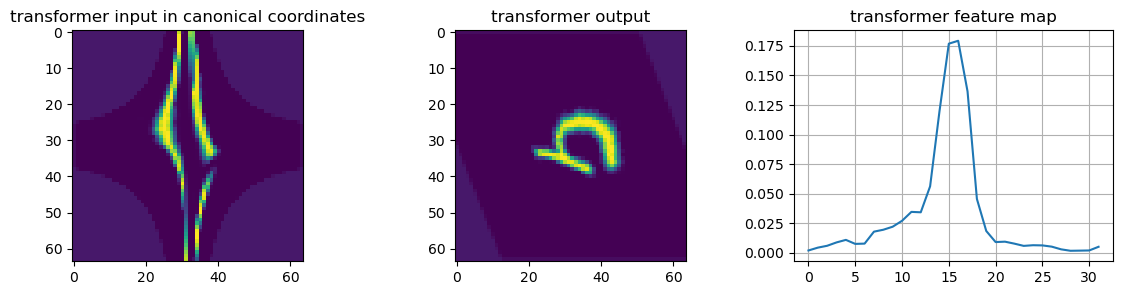

HyperbolicRotation
predicted parameter(s) = [0.0675363764166832]


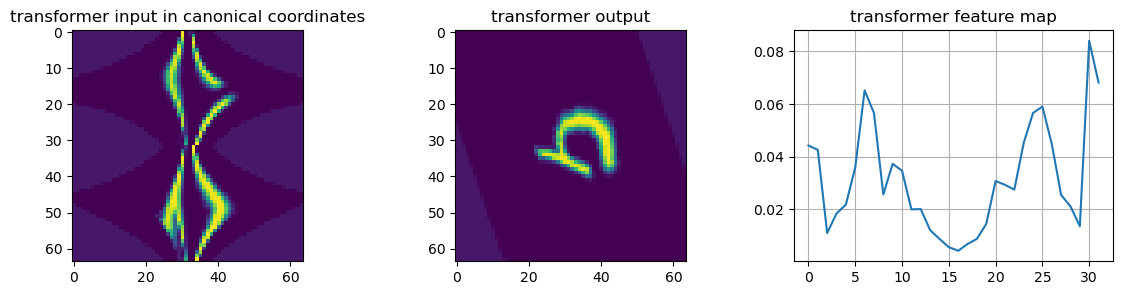

PerspectiveX
predicted parameter(s) = [-0.04814464598894119]


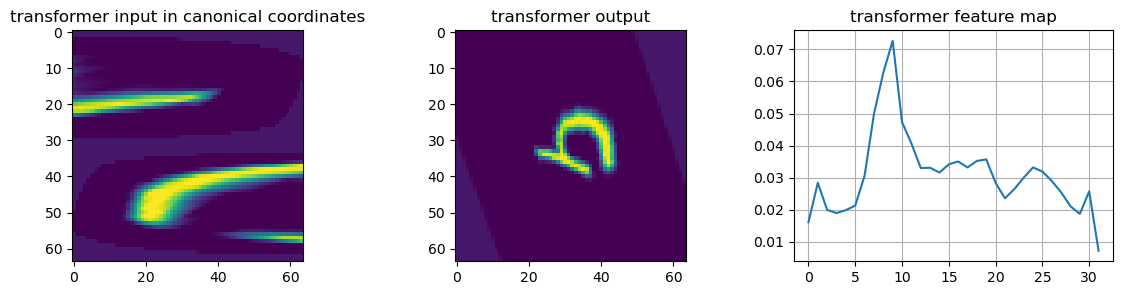

PerspectiveY
predicted parameter(s) = [-0.05059186369180679]


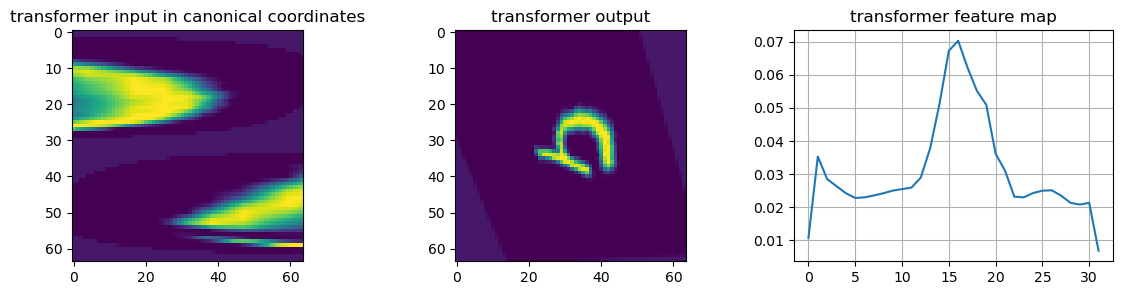

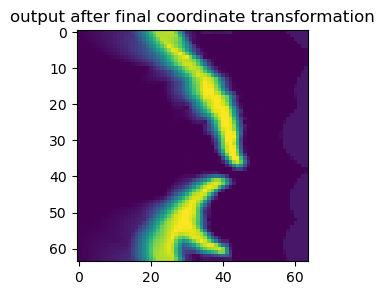

In [15]:
idx = np.random.randint(len(mnist_data))
print(';')
print('example index =', idx)
visualize_transformation(
    mnist_data[idx][0], 
    mnist_model)

example index = 3980


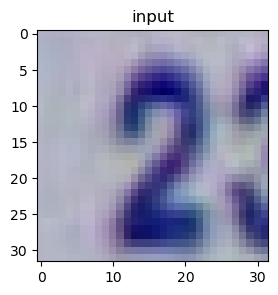

Translation
predicted parameter(s) = [0.025739915668964386, 0.03887825459241867]


/home/zyxue/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:4316: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


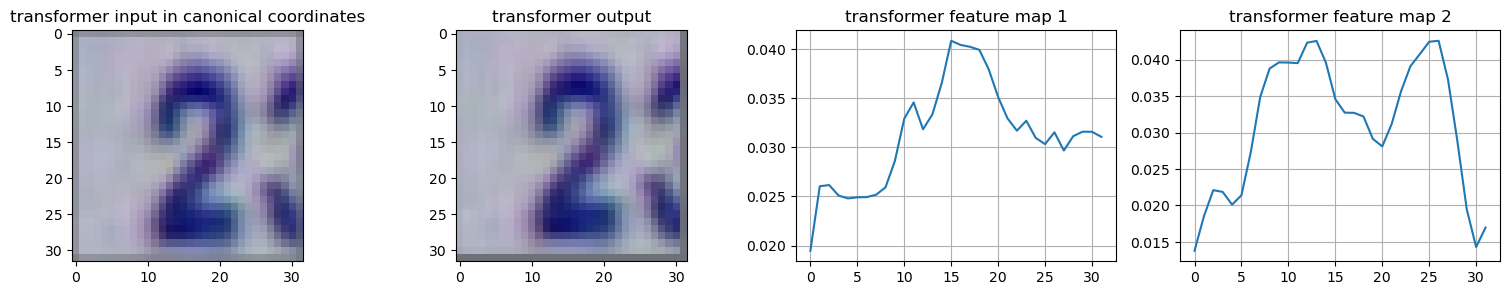

RotationScale
predicted parameter(s) = [-0.05361025035381317, -3.071958303451538]


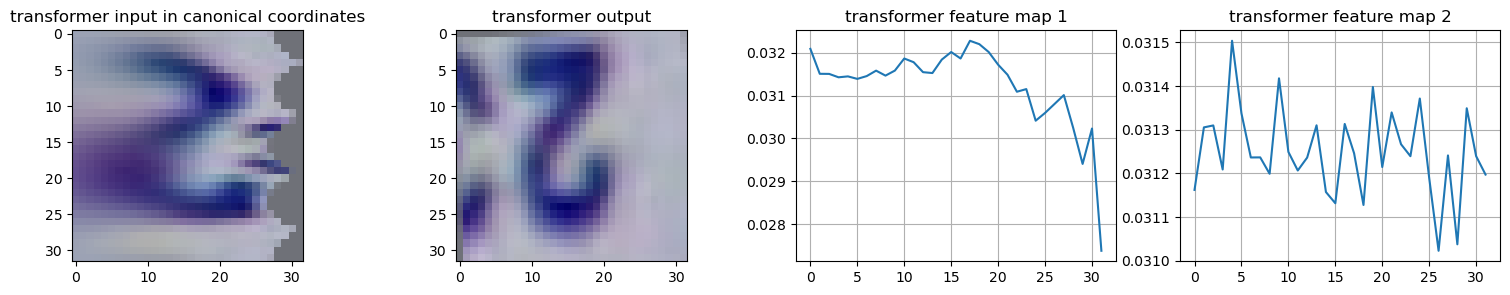

ScaleX
predicted parameter(s) = [-0.4352826178073883]


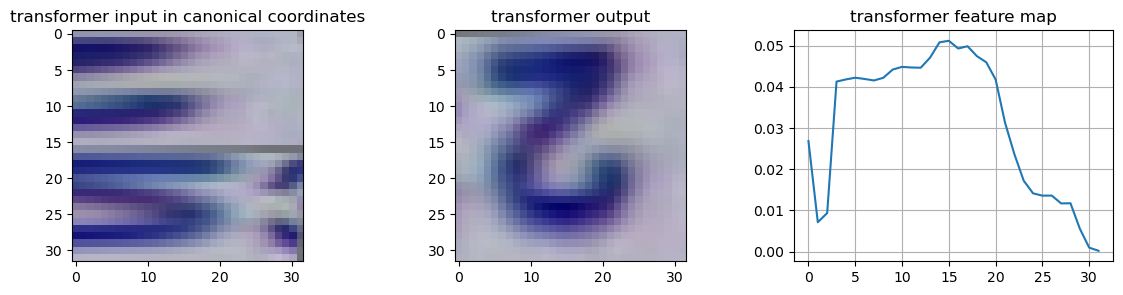

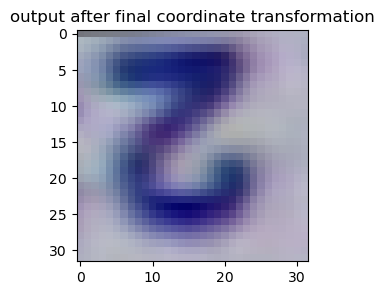

In [16]:
idx = np.random.randint(len(svhn_data))
print('example index =', idx)
visualize_transformation(svhn_data[idx][0], svhn_model)

# Train Model

In [18]:
from experiment_mnist import MNISTModel
from experiment_svhn import SVHNModel


print('Train MNNIST Model with ShearX,HyperbolicRotation,PerspectiveX,PerspectiveY')
model = MNISTModel()
model.train(show_plot=True,train_path='/home/zyxue/ece594n/equivariant-transformers/data/mnist/train.pt',valid_path='/home/zyxue/ece594n/equivariant-transformers/data/mnist/valid.pt',num_epochs=100,batch_size=256)

INFO:root:Projective MNIST classification
INFO:root:Transformers: ShearX -> HyperbolicRotation -> PerspectiveX -> PerspectiveY
INFO:root:Pose module: EquivariantPosePredictor
INFO:root:Coordinate transformation before classification: logpolar_grid
INFO:root:Classifier architecture: BasicCNN
INFO:root:Net opts: {'nf': 32, 'p_dropout': 0.3, 'pad_mode': (None, 'cyclic'), 'pool': (True, True, False)}
INFO:root:Transformer opts: {'in_channels': 1, 'kernel_size': 3, 'nf': 32, 'strides': (2, 1)}
/home/zyxue/ece594n/equivariant-transformers/experiments.py:150: UserWarning: save_path not specified: model will not be saved
  warnings.warn('save_path not specified: model will not be saved')
INFO:root:Loading training data from /home/zyxue/ece594n/equivariant-transformers/data/mnist/train.pt


Train MNNIST Model with ShearX,HyperbolicRotation,PerspectiveX,PerspectiveY


INFO:root:Loading validation data from /home/zyxue/ece594n/equivariant-transformers/data/mnist/valid.pt


Output()

INFO:root:Training epoch 1
  0%|          | 0/312 [00:00<?, ?it/s]/home/zyxue/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:4316: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.98it/s]
INFO:root:Validation loss = 4.14e-01, validation error = 0.1276


INFO:root:Training epoch 2
100%|██████████| 312/312 [00:31<00:00,  9.95it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 84.40it/s]
INFO:root:Validation loss = 2.93e-01, validation error = 0.0916


INFO:root:Training epoch 3
100%|██████████| 312/312 [00:31<00:00,  9.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 88.07it/s]
INFO:root:Validation loss = 2.56e-01, validation error = 0.0784


INFO:root:Training epoch 4
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.62it/s]
INFO:root:Validation loss = 2.01e-01, validation error = 0.0616


INFO:root:Training epoch 5
100%|██████████| 312/312 [00:31<00:00,  9.84it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.50it/s]
INFO:root:Validation loss = 1.99e-01, validation error = 0.0592


INFO:root:Training epoch 6
100%|██████████| 312/312 [00:31<00:00,  9.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.68it/s]
INFO:root:Validation loss = 1.93e-01, validation error = 0.0556


INFO:root:Training epoch 7
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.53it/s]
INFO:root:Validation loss = 1.86e-01, validation error = 0.0542


INFO:root:Training epoch 8
100%|██████████| 312/312 [00:31<00:00,  9.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 92.93it/s]
INFO:root:Validation loss = 1.60e-01, validation error = 0.0490


INFO:root:Training epoch 9
100%|██████████| 312/312 [00:31<00:00,  9.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.90it/s]
INFO:root:Validation loss = 1.57e-01, validation error = 0.0500


INFO:root:Training epoch 10
100%|██████████| 312/312 [00:31<00:00,  9.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.45it/s]
INFO:root:Validation loss = 1.52e-01, validation error = 0.0460


INFO:root:Training epoch 11
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 92.76it/s]
INFO:root:Validation loss = 1.61e-01, validation error = 0.0436


INFO:root:Training epoch 12
100%|██████████| 312/312 [00:31<00:00,  9.84it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 93.15it/s]
INFO:root:Validation loss = 1.49e-01, validation error = 0.0424


INFO:root:Training epoch 13
100%|██████████| 312/312 [00:31<00:00,  9.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.28it/s]
INFO:root:Validation loss = 1.41e-01, validation error = 0.0438


INFO:root:Training epoch 14
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 84.89it/s]
INFO:root:Validation loss = 1.50e-01, validation error = 0.0420


INFO:root:Training epoch 15
100%|██████████| 312/312 [00:31<00:00,  9.85it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.15it/s]
INFO:root:Validation loss = 1.48e-01, validation error = 0.0410


INFO:root:Training epoch 16
100%|██████████| 312/312 [00:31<00:00,  9.89it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.39it/s]
INFO:root:Validation loss = 1.32e-01, validation error = 0.0374


INFO:root:Training epoch 17
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.35it/s]
INFO:root:Validation loss = 1.28e-01, validation error = 0.0372


INFO:root:Training epoch 18
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 92.84it/s]
INFO:root:Validation loss = 1.47e-01, validation error = 0.0422


INFO:root:Training epoch 19
100%|██████████| 312/312 [00:31<00:00,  9.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 92.09it/s]
INFO:root:Validation loss = 1.41e-01, validation error = 0.0378


INFO:root:Training epoch 20
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.41it/s]
INFO:root:Validation loss = 1.51e-01, validation error = 0.0402


INFO:root:Training epoch 21
100%|██████████| 312/312 [00:31<00:00,  9.87it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.61it/s]
INFO:root:Validation loss = 1.45e-01, validation error = 0.0388


INFO:root:Training epoch 22
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 83.42it/s]
INFO:root:Validation loss = 1.60e-01, validation error = 0.0436


INFO:root:Training epoch 23
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.55it/s]
INFO:root:Validation loss = 1.41e-01, validation error = 0.0372


INFO:root:Training epoch 24
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 91.80it/s]
INFO:root:Validation loss = 1.40e-01, validation error = 0.0380


INFO:root:Training epoch 25
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 91.33it/s]
INFO:root:Validation loss = 1.29e-01, validation error = 0.0356


INFO:root:Training epoch 26
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 91.80it/s]
INFO:root:Validation loss = 1.34e-01, validation error = 0.0368


INFO:root:Training epoch 27
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.68it/s]
INFO:root:Validation loss = 1.24e-01, validation error = 0.0330


INFO:root:Training epoch 28
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.04it/s]
INFO:root:Validation loss = 1.41e-01, validation error = 0.0354


INFO:root:Training epoch 29
100%|██████████| 312/312 [00:31<00:00,  9.85it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 88.59it/s]
INFO:root:Validation loss = 1.33e-01, validation error = 0.0332


INFO:root:Training epoch 30
100%|██████████| 312/312 [00:31<00:00,  9.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.37it/s]
INFO:root:Validation loss = 1.38e-01, validation error = 0.0336


INFO:root:Training epoch 31
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 91.14it/s]
INFO:root:Validation loss = 1.37e-01, validation error = 0.0344


INFO:root:Training epoch 32
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 91.76it/s]
INFO:root:Validation loss = 1.33e-01, validation error = 0.0320


INFO:root:Training epoch 33
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.22it/s]
INFO:root:Validation loss = 1.44e-01, validation error = 0.0368


INFO:root:Training epoch 34
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.74it/s]
INFO:root:Validation loss = 1.37e-01, validation error = 0.0356


INFO:root:Training epoch 35
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 84.24it/s]
INFO:root:Validation loss = 1.29e-01, validation error = 0.0344


INFO:root:Training epoch 36
100%|██████████| 312/312 [00:31<00:00,  9.85it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.27it/s]
INFO:root:Validation loss = 1.35e-01, validation error = 0.0356


INFO:root:Training epoch 37
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 93.47it/s]
INFO:root:Validation loss = 1.26e-01, validation error = 0.0354


INFO:root:Training epoch 38
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.51it/s]
INFO:root:Validation loss = 1.44e-01, validation error = 0.0358


INFO:root:Training epoch 39
100%|██████████| 312/312 [00:31<00:00,  9.89it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.25it/s]
INFO:root:Validation loss = 1.44e-01, validation error = 0.0358


INFO:root:Training epoch 40
100%|██████████| 312/312 [00:31<00:00,  9.83it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 91.28it/s]
INFO:root:Validation loss = 1.35e-01, validation error = 0.0334


INFO:root:Training epoch 41
100%|██████████| 312/312 [00:31<00:00,  9.83it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 92.15it/s]
INFO:root:Validation loss = 1.43e-01, validation error = 0.0352


INFO:root:Training epoch 42
100%|██████████| 312/312 [00:31<00:00,  9.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.31it/s]
INFO:root:Validation loss = 1.38e-01, validation error = 0.0330


INFO:root:Training epoch 43
100%|██████████| 312/312 [00:31<00:00,  9.85it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.96it/s]
INFO:root:Validation loss = 1.46e-01, validation error = 0.0358


INFO:root:Training epoch 44
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.11it/s]
INFO:root:Validation loss = 1.37e-01, validation error = 0.0322


INFO:root:Training epoch 45
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 88.22it/s]
INFO:root:Validation loss = 1.26e-01, validation error = 0.0304


INFO:root:Training epoch 46
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.13it/s]
INFO:root:Validation loss = 1.40e-01, validation error = 0.0322


INFO:root:Training epoch 47
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.31it/s]
INFO:root:Validation loss = 1.42e-01, validation error = 0.0348


INFO:root:Training epoch 48
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.37it/s]
INFO:root:Validation loss = 1.38e-01, validation error = 0.0332


INFO:root:Training epoch 49
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.19it/s]
INFO:root:Validation loss = 1.35e-01, validation error = 0.0340


INFO:root:Training epoch 50
100%|██████████| 312/312 [00:31<00:00,  9.84it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.59it/s]
INFO:root:Validation loss = 1.35e-01, validation error = 0.0334


INFO:root:Training epoch 51
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 92.65it/s]
INFO:root:Validation loss = 1.28e-01, validation error = 0.0308


INFO:root:Training epoch 52
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.09it/s]
INFO:root:Validation loss = 1.33e-01, validation error = 0.0312


INFO:root:Training epoch 53
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.17it/s]
INFO:root:Validation loss = 1.37e-01, validation error = 0.0328


INFO:root:Training epoch 54
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.48it/s]
INFO:root:Validation loss = 1.34e-01, validation error = 0.0288


INFO:root:Training epoch 55
100%|██████████| 312/312 [00:31<00:00,  9.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.98it/s]
INFO:root:Validation loss = 1.35e-01, validation error = 0.0322


INFO:root:Training epoch 56
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.66it/s]
INFO:root:Validation loss = 1.32e-01, validation error = 0.0296


INFO:root:Training epoch 57
100%|██████████| 312/312 [00:31<00:00,  9.87it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.37it/s]
INFO:root:Validation loss = 1.34e-01, validation error = 0.0320


INFO:root:Training epoch 58
100%|██████████| 312/312 [00:31<00:00,  9.89it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.68it/s]
INFO:root:Validation loss = 1.30e-01, validation error = 0.0300


INFO:root:Training epoch 59
100%|██████████| 312/312 [00:31<00:00,  9.89it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.03it/s]
INFO:root:Validation loss = 1.40e-01, validation error = 0.0308


INFO:root:Training epoch 60
100%|██████████| 312/312 [00:31<00:00,  9.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.48it/s]
INFO:root:Validation loss = 1.38e-01, validation error = 0.0318


INFO:root:Training epoch 61
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.54it/s]
INFO:root:Validation loss = 1.39e-01, validation error = 0.0330


INFO:root:Training epoch 62
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.83it/s]
INFO:root:Validation loss = 1.36e-01, validation error = 0.0316


INFO:root:Training epoch 63
100%|██████████| 312/312 [00:31<00:00,  9.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 93.66it/s]
INFO:root:Validation loss = 1.45e-01, validation error = 0.0334


INFO:root:Training epoch 64
100%|██████████| 312/312 [00:31<00:00,  9.87it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.42it/s]
INFO:root:Validation loss = 1.44e-01, validation error = 0.0322


INFO:root:Training epoch 65
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 84.38it/s]
INFO:root:Validation loss = 1.41e-01, validation error = 0.0328


INFO:root:Training epoch 66
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.10it/s]
INFO:root:Validation loss = 1.37e-01, validation error = 0.0340


INFO:root:Training epoch 67
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.74it/s]
INFO:root:Validation loss = 1.35e-01, validation error = 0.0274


INFO:root:Training epoch 68
100%|██████████| 312/312 [00:31<00:00,  9.87it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 84.58it/s]
INFO:root:Validation loss = 1.46e-01, validation error = 0.0316


INFO:root:Training epoch 69
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.68it/s]
INFO:root:Validation loss = 1.39e-01, validation error = 0.0318


INFO:root:Training epoch 70
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.91it/s]
INFO:root:Validation loss = 1.42e-01, validation error = 0.0314


INFO:root:Training epoch 71
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 92.66it/s]
INFO:root:Validation loss = 1.47e-01, validation error = 0.0330


INFO:root:Training epoch 72
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.50it/s]
INFO:root:Validation loss = 1.41e-01, validation error = 0.0324


INFO:root:Training epoch 73
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 84.68it/s]
INFO:root:Validation loss = 1.39e-01, validation error = 0.0320


INFO:root:Training epoch 74
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 88.90it/s]
INFO:root:Validation loss = 1.38e-01, validation error = 0.0300


INFO:root:Training epoch 75
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.62it/s]
INFO:root:Validation loss = 1.44e-01, validation error = 0.0312


INFO:root:Training epoch 76
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.89it/s]
INFO:root:Validation loss = 1.42e-01, validation error = 0.0322


INFO:root:Training epoch 77
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.16it/s]
INFO:root:Validation loss = 1.37e-01, validation error = 0.0292


INFO:root:Training epoch 78
100%|██████████| 312/312 [00:31<00:00,  9.85it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.21it/s]
INFO:root:Validation loss = 1.32e-01, validation error = 0.0282


INFO:root:Training epoch 79
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.15it/s]
INFO:root:Validation loss = 1.34e-01, validation error = 0.0316


INFO:root:Training epoch 80
100%|██████████| 312/312 [00:31<00:00,  9.87it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.04it/s]
INFO:root:Validation loss = 1.36e-01, validation error = 0.0294


INFO:root:Training epoch 81
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.26it/s]
INFO:root:Validation loss = 1.45e-01, validation error = 0.0316


INFO:root:Training epoch 82
100%|██████████| 312/312 [00:31<00:00,  9.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.52it/s]
INFO:root:Validation loss = 1.45e-01, validation error = 0.0308


INFO:root:Training epoch 83
100%|██████████| 312/312 [00:31<00:00,  9.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.59it/s]
INFO:root:Validation loss = 1.40e-01, validation error = 0.0290


INFO:root:Training epoch 84
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 90.23it/s]
INFO:root:Validation loss = 1.47e-01, validation error = 0.0318


INFO:root:Training epoch 85
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.70it/s]
INFO:root:Validation loss = 1.42e-01, validation error = 0.0298


INFO:root:Training epoch 86
100%|██████████| 312/312 [00:31<00:00,  9.87it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.06it/s]
INFO:root:Validation loss = 1.42e-01, validation error = 0.0300


INFO:root:Training epoch 87
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 91.89it/s]
INFO:root:Validation loss = 1.41e-01, validation error = 0.0288


INFO:root:Training epoch 88
100%|██████████| 312/312 [00:31<00:00,  9.85it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 91.76it/s]
INFO:root:Validation loss = 1.41e-01, validation error = 0.0282


INFO:root:Training epoch 89
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 87.27it/s]
INFO:root:Validation loss = 1.46e-01, validation error = 0.0308


INFO:root:Training epoch 90
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.42it/s]
INFO:root:Validation loss = 1.56e-01, validation error = 0.0338


INFO:root:Training epoch 91
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 89.83it/s]
INFO:root:Validation loss = 1.51e-01, validation error = 0.0296


INFO:root:Training epoch 92
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.64it/s]
INFO:root:Validation loss = 1.47e-01, validation error = 0.0310


INFO:root:Training epoch 93
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 91.67it/s]
INFO:root:Validation loss = 1.50e-01, validation error = 0.0304


INFO:root:Training epoch 94
100%|██████████| 312/312 [00:31<00:00,  9.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 85.73it/s]
INFO:root:Validation loss = 1.45e-01, validation error = 0.0278


INFO:root:Training epoch 95
100%|██████████| 312/312 [00:31<00:00,  9.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.66it/s]
INFO:root:Validation loss = 1.45e-01, validation error = 0.0282


INFO:root:Training epoch 96
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 92.28it/s]
INFO:root:Validation loss = 1.43e-01, validation error = 0.0320


INFO:root:Training epoch 97
100%|██████████| 312/312 [00:31<00:00,  9.87it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.76it/s]
INFO:root:Validation loss = 1.41e-01, validation error = 0.0280


INFO:root:Training epoch 98
100%|██████████| 312/312 [00:31<00:00,  9.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 82.36it/s]
INFO:root:Validation loss = 1.50e-01, validation error = 0.0286


INFO:root:Training epoch 99
100%|██████████| 312/312 [00:31<00:00,  9.85it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 83.85it/s]
INFO:root:Validation loss = 1.43e-01, validation error = 0.0288


INFO:root:Training epoch 100
100%|██████████| 312/312 [00:31<00:00,  9.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 86.43it/s]
INFO:root:Validation loss = 1.52e-01, validation error = 0.0298


INFO:root:Finished training in 3268.3 s


In [19]:
print('Train MNNIST Model with No ETs Layers')
model = MNISTModel(tfs=[])
model.train(show_plot=True,train_path='/home/zyxue/ece594n/equivariant-transformers/data/mnist/train.pt',valid_path='/home/zyxue/ece594n/equivariant-transformers/data/mnist/valid.pt',num_epochs=100,batch_size=256)

INFO:root:Projective MNIST classification
INFO:root:Coordinate transformation before classification: logpolar_grid
INFO:root:Classifier architecture: BasicCNN
INFO:root:Net opts: {'nf': 32, 'p_dropout': 0.3, 'pad_mode': (None, 'cyclic'), 'pool': (True, True, False)}
INFO:root:Transformer opts: {'in_channels': 1, 'kernel_size': 3, 'nf': 32, 'strides': (2, 1)}
/home/zyxue/ece594n/equivariant-transformers/experiments.py:150: UserWarning: save_path not specified: model will not be saved
  warnings.warn('save_path not specified: model will not be saved')
INFO:root:Loading training data from /home/zyxue/ece594n/equivariant-transformers/data/mnist/train.pt


Train MNNIST Model with No ETs Layers


INFO:root:Loading validation data from /home/zyxue/ece594n/equivariant-transformers/data/mnist/valid.pt


Output()

INFO:root:Training epoch 1
  0%|          | 0/312 [00:00<?, ?it/s]/home/zyxue/anaconda3/lib/python3.11/site-packages/torch/nn/functional.py:4316: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
100%|██████████| 312/312 [00:09<00:00, 31.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 211.51it/s]
INFO:root:Validation loss = 5.78e-01, validation error = 0.1820


INFO:root:Training epoch 2
100%|██████████| 312/312 [00:09<00:00, 31.42it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 217.97it/s]
INFO:root:Validation loss = 4.40e-01, validation error = 0.1422


INFO:root:Training epoch 3
100%|██████████| 312/312 [00:09<00:00, 31.98it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 235.74it/s]
INFO:root:Validation loss = 3.58e-01, validation error = 0.1068


INFO:root:Training epoch 4
100%|██████████| 312/312 [00:09<00:00, 31.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.70it/s]
INFO:root:Validation loss = 3.06e-01, validation error = 0.0930


INFO:root:Training epoch 5
100%|██████████| 312/312 [00:09<00:00, 31.96it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 225.41it/s]
INFO:root:Validation loss = 3.73e-01, validation error = 0.1126


INFO:root:Training epoch 6
100%|██████████| 312/312 [00:09<00:00, 32.01it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 210.45it/s]
INFO:root:Validation loss = 2.44e-01, validation error = 0.0732


INFO:root:Training epoch 7
100%|██████████| 312/312 [00:09<00:00, 31.96it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 209.53it/s]
INFO:root:Validation loss = 2.55e-01, validation error = 0.0800


INFO:root:Training epoch 8
100%|██████████| 312/312 [00:09<00:00, 31.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 204.58it/s]
INFO:root:Validation loss = 2.46e-01, validation error = 0.0740


INFO:root:Training epoch 9
100%|██████████| 312/312 [00:09<00:00, 31.48it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 224.17it/s]
INFO:root:Validation loss = 2.34e-01, validation error = 0.0734


INFO:root:Training epoch 10
100%|██████████| 312/312 [00:09<00:00, 32.01it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 201.50it/s]
INFO:root:Validation loss = 2.25e-01, validation error = 0.0702


INFO:root:Training epoch 11
100%|██████████| 312/312 [00:09<00:00, 32.06it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 210.65it/s]
INFO:root:Validation loss = 2.14e-01, validation error = 0.0644


INFO:root:Training epoch 12
100%|██████████| 312/312 [00:09<00:00, 31.89it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 221.58it/s]
INFO:root:Validation loss = 1.92e-01, validation error = 0.0568


INFO:root:Training epoch 13
100%|██████████| 312/312 [00:09<00:00, 31.96it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.90it/s]
INFO:root:Validation loss = 2.12e-01, validation error = 0.0644


INFO:root:Training epoch 14
100%|██████████| 312/312 [00:09<00:00, 31.97it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 225.82it/s]
INFO:root:Validation loss = 1.89e-01, validation error = 0.0594


INFO:root:Training epoch 15
100%|██████████| 312/312 [00:09<00:00, 31.89it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 210.03it/s]
INFO:root:Validation loss = 1.92e-01, validation error = 0.0558


INFO:root:Training epoch 16
100%|██████████| 312/312 [00:10<00:00, 31.18it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 236.61it/s]
INFO:root:Validation loss = 1.89e-01, validation error = 0.0532


INFO:root:Training epoch 17
100%|██████████| 312/312 [00:09<00:00, 31.98it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 210.93it/s]
INFO:root:Validation loss = 2.12e-01, validation error = 0.0638


INFO:root:Training epoch 18
100%|██████████| 312/312 [00:09<00:00, 31.85it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 202.29it/s]
INFO:root:Validation loss = 1.73e-01, validation error = 0.0518


INFO:root:Training epoch 19
100%|██████████| 312/312 [00:09<00:00, 31.59it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 211.22it/s]
INFO:root:Validation loss = 1.92e-01, validation error = 0.0558


INFO:root:Training epoch 20
100%|██████████| 312/312 [00:09<00:00, 31.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 235.98it/s]
INFO:root:Validation loss = 1.81e-01, validation error = 0.0562


INFO:root:Training epoch 21
100%|██████████| 312/312 [00:09<00:00, 31.91it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 235.33it/s]
INFO:root:Validation loss = 1.77e-01, validation error = 0.0502


INFO:root:Training epoch 22
100%|██████████| 312/312 [00:09<00:00, 31.98it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 236.64it/s]
INFO:root:Validation loss = 1.83e-01, validation error = 0.0544


INFO:root:Training epoch 23
100%|██████████| 312/312 [00:09<00:00, 31.39it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 234.40it/s]
INFO:root:Validation loss = 1.68e-01, validation error = 0.0464


INFO:root:Training epoch 24
100%|██████████| 312/312 [00:09<00:00, 31.99it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 232.74it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0492


INFO:root:Training epoch 25
100%|██████████| 312/312 [00:09<00:00, 31.92it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 220.73it/s]
INFO:root:Validation loss = 1.78e-01, validation error = 0.0510


INFO:root:Training epoch 26
100%|██████████| 312/312 [00:09<00:00, 31.96it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 233.39it/s]
INFO:root:Validation loss = 1.83e-01, validation error = 0.0524


INFO:root:Training epoch 27
100%|██████████| 312/312 [00:09<00:00, 32.02it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 236.54it/s]
INFO:root:Validation loss = 1.81e-01, validation error = 0.0514


INFO:root:Training epoch 28
100%|██████████| 312/312 [00:09<00:00, 31.97it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 210.46it/s]
INFO:root:Validation loss = 1.73e-01, validation error = 0.0496


INFO:root:Training epoch 29
100%|██████████| 312/312 [00:09<00:00, 31.81it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 221.56it/s]
INFO:root:Validation loss = 1.79e-01, validation error = 0.0496


INFO:root:Training epoch 30
100%|██████████| 312/312 [00:09<00:00, 31.33it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 220.43it/s]
INFO:root:Validation loss = 1.81e-01, validation error = 0.0516


INFO:root:Training epoch 31
100%|██████████| 312/312 [00:09<00:00, 31.96it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 234.48it/s]
INFO:root:Validation loss = 1.67e-01, validation error = 0.0470


INFO:root:Training epoch 32
100%|██████████| 312/312 [00:09<00:00, 31.98it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 236.18it/s]
INFO:root:Validation loss = 1.68e-01, validation error = 0.0472


INFO:root:Training epoch 33
100%|██████████| 312/312 [00:09<00:00, 31.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 214.30it/s]
INFO:root:Validation loss = 1.73e-01, validation error = 0.0506


INFO:root:Training epoch 34
100%|██████████| 312/312 [00:09<00:00, 31.40it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 217.62it/s]
INFO:root:Validation loss = 1.79e-01, validation error = 0.0498


INFO:root:Training epoch 35
100%|██████████| 312/312 [00:09<00:00, 32.05it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 211.84it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0486


INFO:root:Training epoch 36
100%|██████████| 312/312 [00:09<00:00, 31.95it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 233.91it/s]
INFO:root:Validation loss = 1.74e-01, validation error = 0.0500


INFO:root:Training epoch 37
100%|██████████| 312/312 [00:09<00:00, 31.48it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 211.13it/s]
INFO:root:Validation loss = 1.66e-01, validation error = 0.0468


INFO:root:Training epoch 38
100%|██████████| 312/312 [00:09<00:00, 31.99it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 223.40it/s]
INFO:root:Validation loss = 1.79e-01, validation error = 0.0490


INFO:root:Training epoch 39
100%|██████████| 312/312 [00:09<00:00, 31.96it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 235.19it/s]
INFO:root:Validation loss = 1.78e-01, validation error = 0.0498


INFO:root:Training epoch 40
100%|██████████| 312/312 [00:09<00:00, 31.80it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.55it/s]
INFO:root:Validation loss = 1.73e-01, validation error = 0.0456


INFO:root:Training epoch 41
100%|██████████| 312/312 [00:09<00:00, 31.70it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 205.11it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0474


INFO:root:Training epoch 42
100%|██████████| 312/312 [00:09<00:00, 31.96it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 234.89it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0466


INFO:root:Training epoch 43
100%|██████████| 312/312 [00:09<00:00, 32.00it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 220.45it/s]
INFO:root:Validation loss = 1.64e-01, validation error = 0.0450


INFO:root:Training epoch 44
100%|██████████| 312/312 [00:09<00:00, 31.30it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 223.42it/s]
INFO:root:Validation loss = 1.64e-01, validation error = 0.0448


INFO:root:Training epoch 45
100%|██████████| 312/312 [00:09<00:00, 31.71it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 224.77it/s]
INFO:root:Validation loss = 1.63e-01, validation error = 0.0424


INFO:root:Training epoch 46
100%|██████████| 312/312 [00:09<00:00, 31.60it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 210.18it/s]
INFO:root:Validation loss = 1.63e-01, validation error = 0.0444


INFO:root:Training epoch 47
100%|██████████| 312/312 [00:09<00:00, 31.82it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 233.33it/s]
INFO:root:Validation loss = 1.67e-01, validation error = 0.0430


INFO:root:Training epoch 48
100%|██████████| 312/312 [00:09<00:00, 31.41it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 209.55it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0478


INFO:root:Training epoch 49
100%|██████████| 312/312 [00:09<00:00, 31.96it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.21it/s]
INFO:root:Validation loss = 1.56e-01, validation error = 0.0444


INFO:root:Training epoch 50
100%|██████████| 312/312 [00:09<00:00, 31.97it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.85it/s]
INFO:root:Validation loss = 1.62e-01, validation error = 0.0442


INFO:root:Training epoch 51
100%|██████████| 312/312 [00:09<00:00, 31.35it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 233.82it/s]
INFO:root:Validation loss = 1.69e-01, validation error = 0.0442


INFO:root:Training epoch 52
100%|██████████| 312/312 [00:09<00:00, 31.89it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 224.95it/s]
INFO:root:Validation loss = 1.66e-01, validation error = 0.0456


INFO:root:Training epoch 53
100%|██████████| 312/312 [00:09<00:00, 31.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.42it/s]
INFO:root:Validation loss = 1.65e-01, validation error = 0.0444


INFO:root:Training epoch 54
100%|██████████| 312/312 [00:09<00:00, 31.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 211.16it/s]
INFO:root:Validation loss = 1.74e-01, validation error = 0.0484


INFO:root:Training epoch 55
100%|██████████| 312/312 [00:10<00:00, 31.11it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.04it/s]
INFO:root:Validation loss = 1.65e-01, validation error = 0.0442


INFO:root:Training epoch 56
100%|██████████| 312/312 [00:09<00:00, 31.90it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 208.21it/s]
INFO:root:Validation loss = 1.64e-01, validation error = 0.0434


INFO:root:Training epoch 57
100%|██████████| 312/312 [00:09<00:00, 31.89it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.30it/s]
INFO:root:Validation loss = 1.69e-01, validation error = 0.0456


INFO:root:Training epoch 58
100%|██████████| 312/312 [00:09<00:00, 31.38it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 235.57it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0458


INFO:root:Training epoch 59
100%|██████████| 312/312 [00:09<00:00, 31.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 202.97it/s]
INFO:root:Validation loss = 1.90e-01, validation error = 0.0510


INFO:root:Training epoch 60
100%|██████████| 312/312 [00:09<00:00, 32.04it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.62it/s]
INFO:root:Validation loss = 1.66e-01, validation error = 0.0446


INFO:root:Training epoch 61
100%|██████████| 312/312 [00:09<00:00, 31.99it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 237.17it/s]
INFO:root:Validation loss = 1.68e-01, validation error = 0.0446


INFO:root:Training epoch 62
100%|██████████| 312/312 [00:09<00:00, 31.46it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.36it/s]
INFO:root:Validation loss = 1.68e-01, validation error = 0.0444


INFO:root:Training epoch 63
100%|██████████| 312/312 [00:09<00:00, 31.95it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 210.26it/s]
INFO:root:Validation loss = 1.64e-01, validation error = 0.0456


INFO:root:Training epoch 64
100%|██████████| 312/312 [00:09<00:00, 31.98it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.72it/s]
INFO:root:Validation loss = 1.64e-01, validation error = 0.0408


INFO:root:Training epoch 65
100%|██████████| 312/312 [00:09<00:00, 31.42it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 236.14it/s]
INFO:root:Validation loss = 1.62e-01, validation error = 0.0454


INFO:root:Training epoch 66
100%|██████████| 312/312 [00:09<00:00, 32.01it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 228.07it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0416


INFO:root:Training epoch 67
100%|██████████| 312/312 [00:09<00:00, 31.94it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 230.14it/s]
INFO:root:Validation loss = 1.71e-01, validation error = 0.0434


INFO:root:Training epoch 68
100%|██████████| 312/312 [00:09<00:00, 31.97it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 228.67it/s]
INFO:root:Validation loss = 1.68e-01, validation error = 0.0464


INFO:root:Training epoch 69
100%|██████████| 312/312 [00:09<00:00, 31.22it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 233.97it/s]
INFO:root:Validation loss = 1.68e-01, validation error = 0.0424


INFO:root:Training epoch 70
100%|██████████| 312/312 [00:09<00:00, 31.77it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 237.31it/s]
INFO:root:Validation loss = 1.64e-01, validation error = 0.0422


INFO:root:Training epoch 71
100%|██████████| 312/312 [00:09<00:00, 31.87it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 213.44it/s]
INFO:root:Validation loss = 1.67e-01, validation error = 0.0418


INFO:root:Training epoch 72
100%|██████████| 312/312 [00:09<00:00, 31.25it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 229.48it/s]
INFO:root:Validation loss = 1.75e-01, validation error = 0.0440


INFO:root:Training epoch 73
100%|██████████| 312/312 [00:09<00:00, 31.82it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 210.88it/s]
INFO:root:Validation loss = 1.69e-01, validation error = 0.0434


INFO:root:Training epoch 74
100%|██████████| 312/312 [00:09<00:00, 31.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 237.01it/s]
INFO:root:Validation loss = 1.71e-01, validation error = 0.0422


INFO:root:Training epoch 75
100%|██████████| 312/312 [00:09<00:00, 32.08it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 238.28it/s]
INFO:root:Validation loss = 1.63e-01, validation error = 0.0392


INFO:root:Training epoch 76
100%|██████████| 312/312 [00:09<00:00, 31.36it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 216.67it/s]
INFO:root:Validation loss = 1.69e-01, validation error = 0.0446


INFO:root:Training epoch 77
100%|██████████| 312/312 [00:09<00:00, 31.84it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 234.80it/s]
INFO:root:Validation loss = 1.63e-01, validation error = 0.0428


INFO:root:Training epoch 78
100%|██████████| 312/312 [00:09<00:00, 31.95it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 237.26it/s]
INFO:root:Validation loss = 1.59e-01, validation error = 0.0412


INFO:root:Training epoch 79
100%|██████████| 312/312 [00:09<00:00, 31.35it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 236.83it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0416


INFO:root:Training epoch 80
100%|██████████| 312/312 [00:09<00:00, 31.85it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 207.03it/s]
INFO:root:Validation loss = 1.68e-01, validation error = 0.0404


INFO:root:Training epoch 81
100%|██████████| 312/312 [00:09<00:00, 31.93it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 228.22it/s]
INFO:root:Validation loss = 1.71e-01, validation error = 0.0420


INFO:root:Training epoch 82
100%|██████████| 312/312 [00:09<00:00, 31.94it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 237.50it/s]
INFO:root:Validation loss = 1.69e-01, validation error = 0.0444


INFO:root:Training epoch 83
100%|██████████| 312/312 [00:09<00:00, 31.86it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.16it/s]
INFO:root:Validation loss = 1.66e-01, validation error = 0.0414


INFO:root:Training epoch 84
100%|██████████| 312/312 [00:09<00:00, 31.94it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 232.32it/s]
INFO:root:Validation loss = 1.68e-01, validation error = 0.0396


INFO:root:Training epoch 85
100%|██████████| 312/312 [00:09<00:00, 31.89it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 213.22it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0418


INFO:root:Training epoch 86
100%|██████████| 312/312 [00:09<00:00, 31.49it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 238.13it/s]
INFO:root:Validation loss = 1.80e-01, validation error = 0.0428


INFO:root:Training epoch 87
100%|██████████| 312/312 [00:09<00:00, 32.03it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 216.33it/s]
INFO:root:Validation loss = 1.81e-01, validation error = 0.0418


INFO:root:Training epoch 88
100%|██████████| 312/312 [00:09<00:00, 32.05it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 236.44it/s]
INFO:root:Validation loss = 1.64e-01, validation error = 0.0418


INFO:root:Training epoch 89
100%|██████████| 312/312 [00:09<00:00, 32.04it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 237.28it/s]
INFO:root:Validation loss = 1.72e-01, validation error = 0.0406


INFO:root:Training epoch 90
100%|██████████| 312/312 [00:09<00:00, 31.30it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 219.03it/s]
INFO:root:Validation loss = 1.74e-01, validation error = 0.0388


INFO:root:Training epoch 91
100%|██████████| 312/312 [00:09<00:00, 31.88it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 234.58it/s]
INFO:root:Validation loss = 1.68e-01, validation error = 0.0416


INFO:root:Training epoch 92
100%|██████████| 312/312 [00:09<00:00, 31.98it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.13it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0424


INFO:root:Training epoch 93
100%|██████████| 312/312 [00:09<00:00, 31.50it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 207.55it/s]
INFO:root:Validation loss = 1.70e-01, validation error = 0.0388


INFO:root:Training epoch 94
100%|██████████| 312/312 [00:09<00:00, 31.98it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 213.03it/s]
INFO:root:Validation loss = 1.64e-01, validation error = 0.0404


INFO:root:Training epoch 95
100%|██████████| 312/312 [00:09<00:00, 32.04it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 237.57it/s]
INFO:root:Validation loss = 1.66e-01, validation error = 0.0386


INFO:root:Training epoch 96
100%|██████████| 312/312 [00:09<00:00, 32.17it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 211.77it/s]
INFO:root:Validation loss = 1.75e-01, validation error = 0.0422


INFO:root:Training epoch 97
100%|██████████| 312/312 [00:09<00:00, 31.24it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 226.07it/s]
INFO:root:Validation loss = 1.83e-01, validation error = 0.0418


INFO:root:Training epoch 98
100%|██████████| 312/312 [00:09<00:00, 31.77it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.65it/s]
INFO:root:Validation loss = 1.63e-01, validation error = 0.0378


INFO:root:Training epoch 99
100%|██████████| 312/312 [00:09<00:00, 31.95it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 207.48it/s]
INFO:root:Validation loss = 1.71e-01, validation error = 0.0406


INFO:root:Training epoch 100
100%|██████████| 312/312 [00:09<00:00, 31.55it/s]
INFO:root:Evaluating model on validation set
100%|██████████| 50/50 [00:00<00:00, 212.76it/s]
INFO:root:Validation loss = 1.76e-01, validation error = 0.0400


INFO:root:Finished training in 1061.6 s
